In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [3]:
df = pd.read_excel("glass (Imbalanced).xlsx")
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0,0.1224,negative
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0,0.0000,negative
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0,0.0000,negative
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0,0.0000,negative
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0,0.0561,negative


In [4]:
df.shape

(214, 10)

In [5]:
df.isnull().sum()

RI       0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
Class    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    int64  
 1    Na     214 non-null    float64
 2    Mg     214 non-null    float64
 3    Al     214 non-null    float64
 4    Si     214 non-null    float64
 5    K      214 non-null    float64
 6    Ca     214 non-null    float64
 7    Ba     214 non-null    float64
 8    Fe     214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 16.8+ KB


In [7]:
lb = LabelEncoder()
df['Class'] = lb.fit_transform(df['Class'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0000,0.1224,0
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0000,0.0000,0
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0000,0.0000,0
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0000,0.0000,0
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0000,0.0561,0
...,...,...,...,...,...,...,...,...,...,...
209,151727782,1470005.00,0.0,234119.00000,73282.00,0.00000,894852.0,0.6615,0.0000,1
210,151622994,1414145.00,0.0,288047.00000,72.61,0.08073,918524.0,106155.0000,0.0000,1
211,151837126,14321.00,325974.0,221921.00000,712492.00,145935.00000,578508.0,162855.0000,0.0000,1
212,151657164,147998.00,0.0,19913.00000,731084.00,0.00000,82814.0,171045.0000,0.0000,1


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,2.140000e+02,2.140000e+02,214.000000,214.000000,214.00000,214.000000,2.140000e+02,214.000000,214.000000,214.000000
mean,1.227665e+08,7.417669e+05,247726.334575,117974.543128,538941.92243,4724.692984,7.142057e+05,5748.958371,0.042611,0.135514
std,5.649972e+07,6.165723e+05,153736.244460,73791.110657,305738.56219,29122.840398,3.639062e+05,28114.616976,0.092474,0.343074
min,1.511150e+05,1.073000e+01,0.000000,0.290000,69.81000,0.000000,5.430000e+00,0.000000,0.000000,0.000000
25%,1.515592e+08,1.327030e+05,36818.000000,48908.000000,73282.00000,0.121095,7.146220e+05,0.000000,0.000000,0.000000
50%,1.517335e+08,1.175410e+06,343485.000000,131078.000000,724644.00000,0.555795,8.432040e+05,0.000000,0.000000,0.000000
75%,1.518502e+08,1.323705e+06,357853.000000,157079.000000,729908.00000,0.608580,8.983490e+05,0.000000,0.056100,0.000000
max,1.531242e+08,1.579065e+06,397814.000000,304097.000000,751804.00000,270135.000000,1.496336e+06,171045.000000,0.510000,1.000000


<AxesSubplot:>

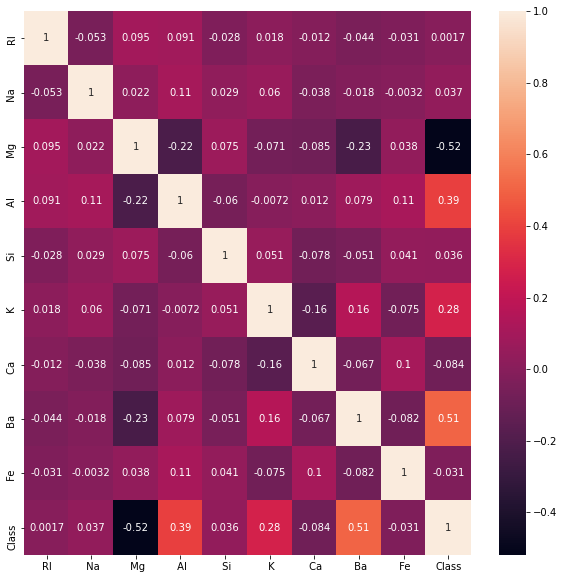

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns = [''] * len(df.columns)
df

,,,,,,,,,,
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0000,0.1224,0
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0000,0.0000,0
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0000,0.0000,0
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0000,0.0000,0
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0000,0.0561,0
...,...,...,...,...,...,...,...,...,...,...
209,151727782,1470005.00,0.0,234119.00000,73282.00,0.00000,894852.0,0.6615,0.0000,1
210,151622994,1414145.00,0.0,288047.00000,72.61,0.08073,918524.0,106155.0000,0.0000,1
211,151837126,14321.00,325974.0,221921.00000,712492.00,145935.00000,578508.0,162855.0000,0.0000,1
212,151657164,147998.00,0.0,19913.00000,731084.00,0.00000,82814.0,171045.0000,0.0000,1


In [11]:
df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0,0.1224,0
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0,0.0000,0
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0,0.0000,0
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0,0.0000,0
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0,0.0561,0


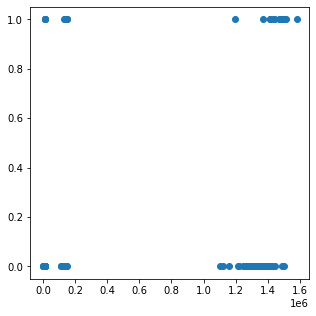

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x = df['Na'], y = df['Class'])
plt.show()

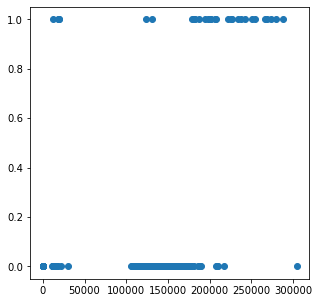

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x = df['Al'], y = df['Class'])
plt.show()

In [14]:
x = df.iloc[:,0:9]
y = df.iloc[:,9:10]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=30)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
209,1
210,1
211,1
212,1


In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
knn.fit(x_train, y_train)

C:\Users\jkana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [21]:
knn1 = KNeighborsClassifier(n_neighbors=40, metric='manhattan')
knn1.fit(x_train, y_train)

C:\Users\jkana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=40)

In [18]:
y_pred  =  knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
y_pred1  =  knn1.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
print("accuracy_score : ",accuracy_score(y_test, y_pred))
print("f1_score : ",f1_score(y_test, y_pred))
y_score1 = knn.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Kneighbours_classifier: ', roc_auc_score(y_test, y_score1))

accuracy_score :  0.8604651162790697
f1_score :  0.0
roc_auc_score for Kneighbours_classifier:  0.8626126126126126


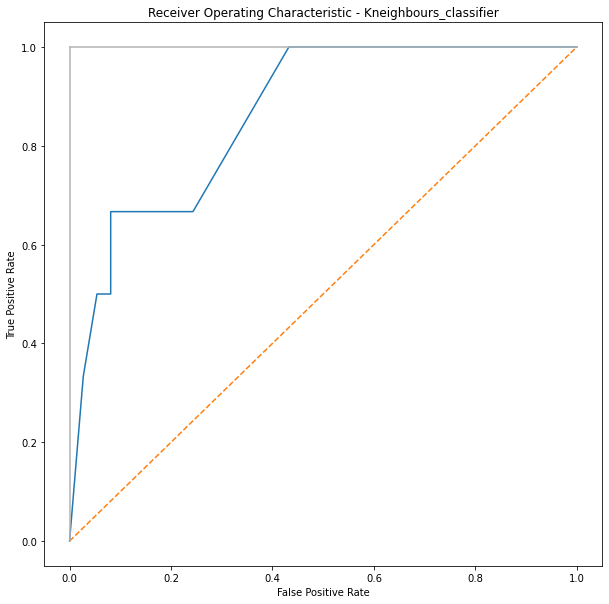

In [23]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Kneighbours_classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
print("accuracy_score : ",accuracy_score(y_test, y_pred1))
print("f1_score : ",f1_score(y_test, y_pred1))
y_score2 = knn.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Kneighbours_classifier: ', roc_auc_score(y_test, y_score2))

accuracy_score :  0.8604651162790697
f1_score :  0.0
roc_auc_score for Kneighbours_classifier:  0.8626126126126126


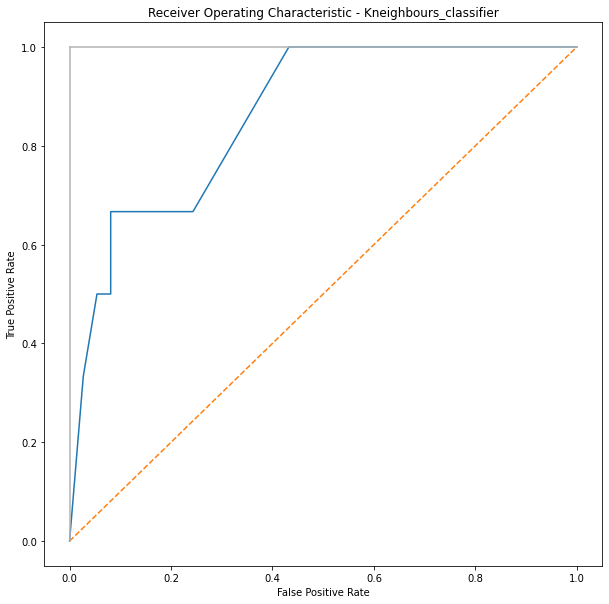

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Kneighbours_classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()